# DESeq analysis on FEATURES
All the oysters included in this analysis have experienced hypoxia or control treatments for either phase 1 and/or phase 2. No other treatments (both, warm) are included in this analysis.

Counts matrix was generated on FEATURES (i.e., exons), not genes, so looking at differentially methylated loci (DML)

# DMGs for hypoxia and control treatments 
All the oysters included in this analysis have experienced hypoxia or control treatments for either phase 1 and/or phase 2. No other treatments (both, warm) are included in this analysis.

#### 08/27/2024
futher investigating DESeq results based on notes from SGW 

first, loading in the dataframes originally generated in deseq_analysis.ipynb that are needed for DESeq
- these would include the counts matrix and meta data

In [2]:
# loading required packages
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(dplyr)
library(ggh4x)

In [6]:
counts <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_gffFC.csv')
head(counts)

,GeneID,Chr,Start,End,Strand,Length,X2018..BBB.WBO.B21.CV_alignment.sam,X2018..BPO.BPO.O16.CV_alignment.sam,X2018..WBR.BBY.W25.CV_alignment.sam,X2018..BBB.WBV.B70.CV_alignment.sam,⋯,X2018..WPO.BPO.G16.CV_alignment.sam,X2018..BBR.BBG.B38.CV_alignment.sam,X2018..WBG.WBG.W44.CV_alignment.sam,X2018..WPO.BPY.G28.CV_alignment.sam,X2018..BBR.BBY.B26.CV_alignment.sam,X2018..WBO.BBR.W03.CV_alignment.sam,X2018..WPR.BPY.G25.CV_alignment.sam,X2018..BBY.WBG.B42.CV_alignment.sam,X2018..WBO.WBV.W64.CV_alignment.sam,X2018..WPV.BPR.G11.CV_alignment.sam
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,NC_035780.1,13578,13603,+,26,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111116054,NC_035780.1,14237,14290,+,54,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111116054,NC_035780.1,14557,14594,+,38,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111126949,NC_035780.1,28961,29073,+,113,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111126949,NC_035780.1,30524,31557,+,1034,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111126949,NC_035780.1,31736,31887,+,152,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(counts)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(counts) = cleaned_column_names2
head(counts)

[1] "GeneID" "Chr"    "Start"  "End"    "Strand" "Length"

[1] "GeneID" "Chr"    "Start"  "End"    "Strand" "Length"

,GeneID,Chr,Start,End,Strand,Length,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,NC_035780.1,13578,13603,+,26,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111116054,NC_035780.1,14237,14290,+,54,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111116054,NC_035780.1,14557,14594,+,38,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111126949,NC_035780.1,28961,29073,+,113,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111126949,NC_035780.1,30524,31557,+,1034,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111126949,NC_035780.1,31736,31887,+,152,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
meta <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')

# changing rownames to the unique sample ID
rownames(meta) <- meta$unique_ID

meta$treatment <- paste(meta$Phase1, meta$Phase2, sep = "_")

# pulling out only the rows I need
meta <- select(meta, Phase1, Phase2, treatment)
head(meta)

,Phase1,Phase2,treatment
,<chr>,<chr>,<chr>
BBB-WBO-B21,hypoxic,control,hypoxic_control
BBB-WBV-B70,hypoxic,control,hypoxic_control
BBO-BBO-B16,hypoxic,hypoxic,hypoxic_hypoxic
BBO-BBY-B27,hypoxic,hypoxic,hypoxic_hypoxic
BBO-WBO-B16,hypoxic,control,hypoxic_control
BBO-WBV-B64,hypoxic,control,hypoxic_control


In [13]:
# setting the same order for counts matrix and meta data
counts <- counts[,rownames(meta)]
all(rownames(meta) == colnames(counts))

[1] TRUE

In [ ]:
head(meta)
head(counts)

now ready for analysis

## Making *all* pairwise comparisons
we want to look at all pairwise comparisons, just to get the full picture..

these include:
- control control vs. hypoxic hypoxic
- hypoxic control vs. control hypoxic

In [14]:
# removing warm both and both both samples
meta_filtered <- filter(meta, meta$Phase2 != 'both')

# need to remove them from counts as well
counts_filtered <- counts[, colnames(counts) %in% rownames(meta_filtered)]

dim(meta_filtered)
dim(counts_filtered)

[1] 20  3

[1] 726075     20

In [15]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ treatment)
dds=DESeq(dds)
resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                                   
[2] "treatment_control_hypoxic_vs_control_control"
[3] "treatment_hypoxic_control_vs_control_control"
[4] "treatment_hypoxic_hypoxic_vs_control_control"

### control control vs. hypoxic hypoxic
CC vs. HH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 36007 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 3, 0.0083%
LFC < -0.25 (down) : 2, 0.0056%
outliers [1]       : 386, 1.1%
low counts [2]     : 0, 0%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



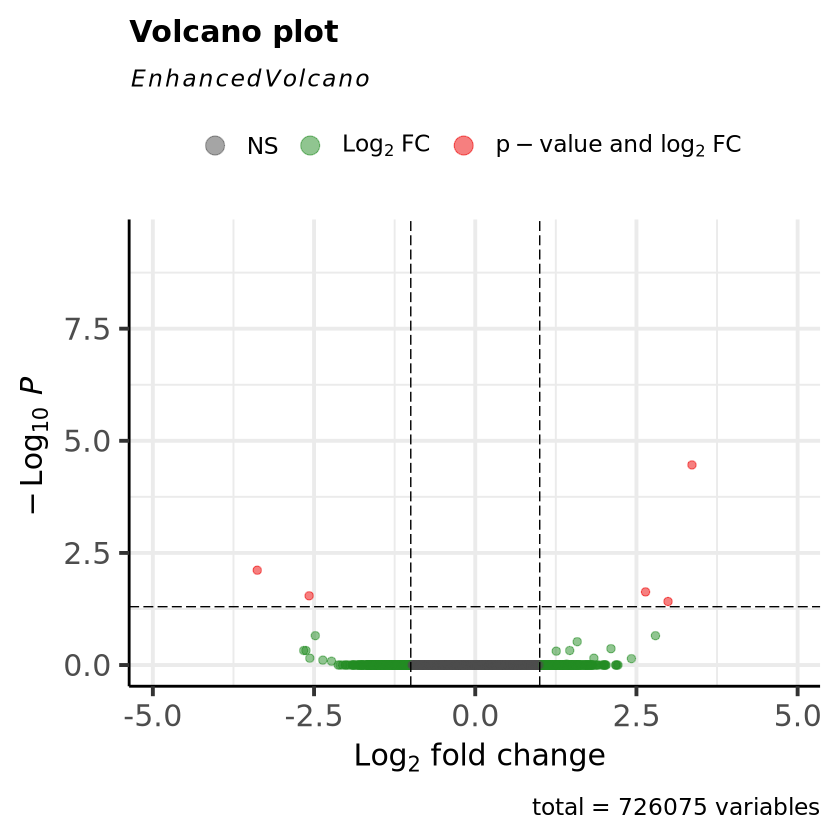

In [16]:
# control control vs. hypoxic hypoxic

contrast2 <- c("treatment", "hypoxic_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      contrast = contrast2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control control

2 DMGs for hypoxic hypoxic

In [11]:
write.csv(as.data.frame(ls), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HH.csv")

### hypoxic control vs. control control
HC vs. CC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 6, 0.044%
LFC < -0.25 (down) : 24, 0.18%
outliers [1]       : 294, 2.2%
low counts [2]     : 5765, 43%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



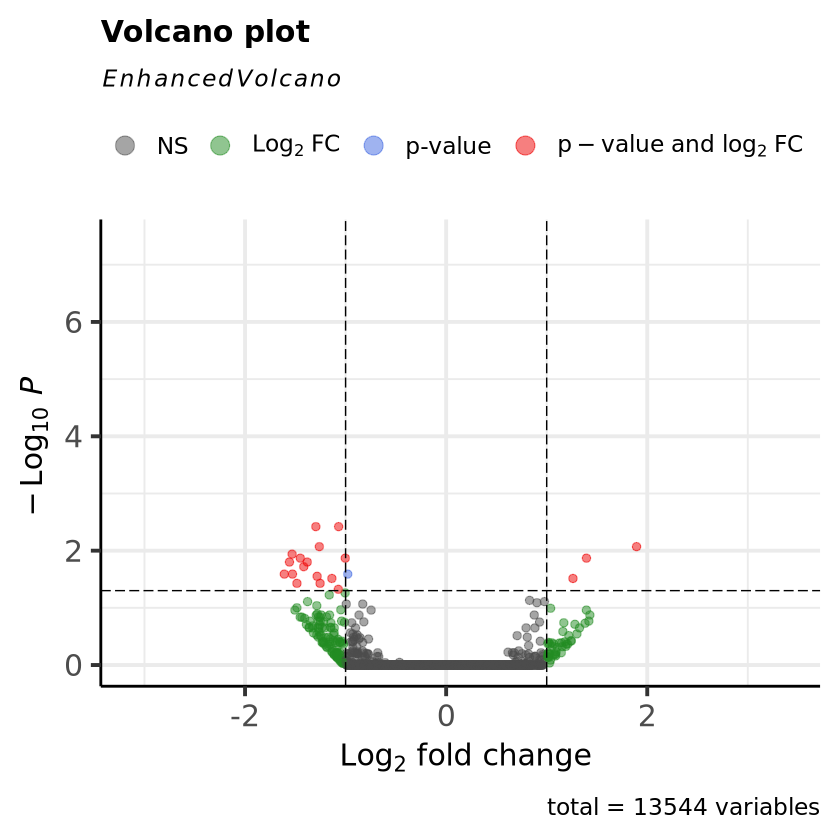

In [12]:
# hypoxic control vs. control control

contrast3 <- c("treatment", "hypoxic_control", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls2<-lfcShrink(dds, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls2)

EnhancedVolcano(ls2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

6 DMGs for hypoxic control

24 DMGs for control control

In [13]:
write.csv(as.data.frame(ls2), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HC.csv")

### control hypoxic vs. control control
CH vs. CC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 1, 0.0074%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



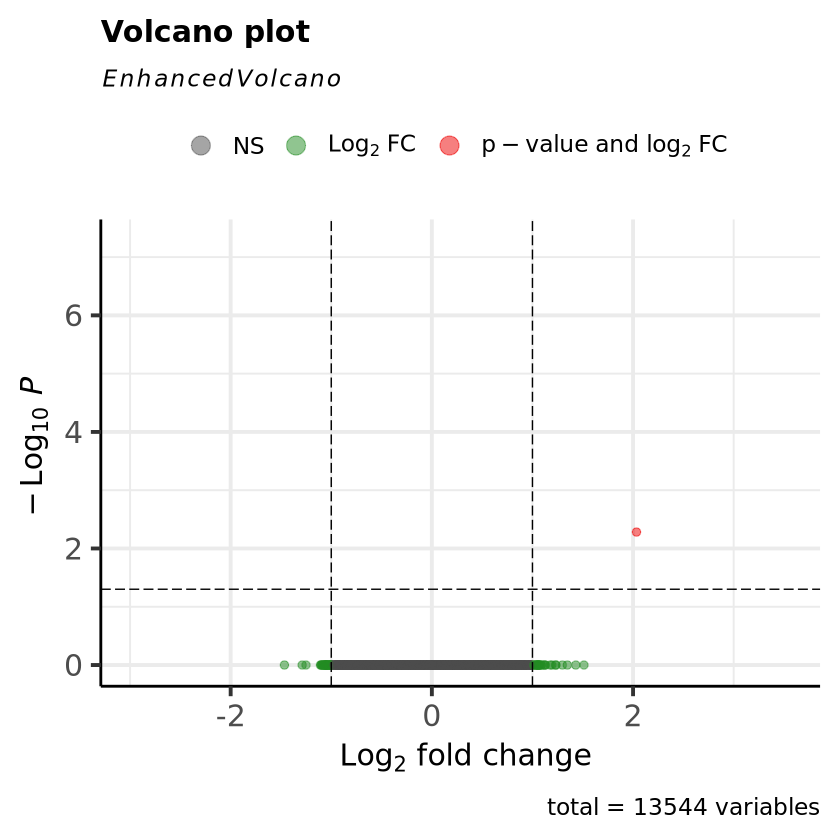

In [14]:
# control hypoxic vs. control control

contrast4 <- c("treatment", "control_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls3<-lfcShrink(dds, # dds object
                      contrast = contrast4, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls3)

EnhancedVolcano(ls3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control hypoxic

0 DMGs for control control

In [15]:
write.csv(as.data.frame(ls3), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_CH.csv")

### hypoxic hypoxic vs. hypoxic control
HH vs. HC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 136, 1%
LFC < -0.25 (down) : 30, 0.22%
outliers [1]       : 294, 2.2%
low counts [2]     : 4264, 32%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



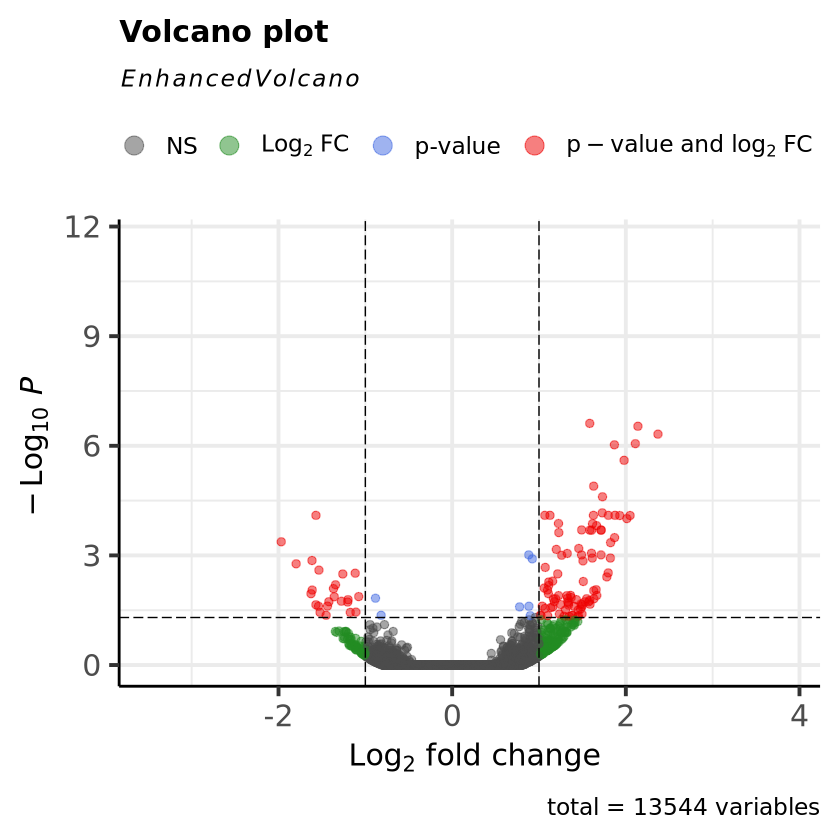

In [16]:
# hypoxic hypoxic vs. hypoxic control

contrast5 <- c("treatment", "hypoxic_hypoxic", "hypoxic_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls4<-lfcShrink(dds, # dds object
                      contrast = contrast5, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls4)

EnhancedVolcano(ls4, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

136 DMGs for hypoxic hypoxic

30 DMGs for hypoxic control

In [17]:
write.csv(as.data.frame(ls4), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_HC.csv")

### hypoxic hypoxic vs. control hypoxic
HH vs. CH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



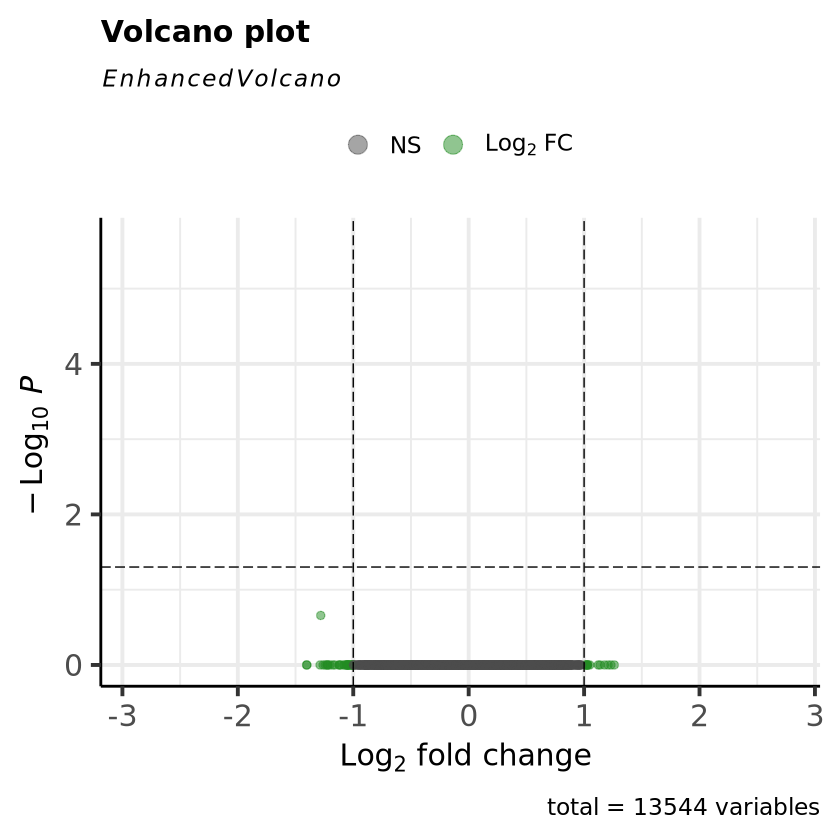

In [18]:
# hypoxic hypoxic vs. control hypoxic

contrast6 <- c("treatment", "hypoxic_hypoxic", "control_hypoxic")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls5<-lfcShrink(dds, # dds object
                      contrast = contrast6, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls5)

EnhancedVolcano(ls5, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for hypoxic hypoxic

0 DMGs for control hypoxic

In [19]:
write.csv(as.data.frame(ls5), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_CH.csv")

### hypoxic control vs. control hypoxic
HC vs. CH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 146, 1.1%
LFC < -0.25 (down) : 241, 1.8%
outliers [1]       : 294, 2.2%
low counts [2]     : 4506, 33%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



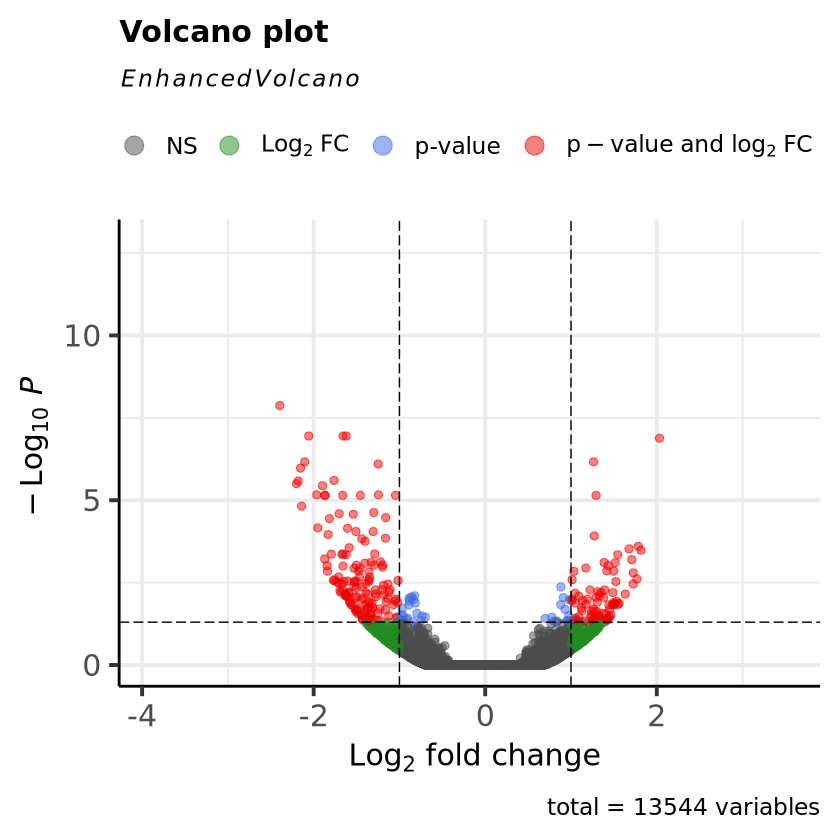

In [20]:
# hypoxic control vs. control hypoxic

contrast9 <- c("treatment", "hypoxic_control", "control_hypoxic")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls6<-lfcShrink(dds, # dds object
                      contrast = contrast9, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls6)

EnhancedVolcano(ls6, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

146 DMGs for hypoxic control

241 DMGs for control hypoxic

so there is a difference in methylation for *when* you experience hypoxic stress

In [21]:
write.csv(as.data.frame(ls6), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CH_vs_HC.csv")

### Phase 1 control vs. hypoxic
Cx vs. Hx

In [22]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                                 colData = meta_filtered,
                                 design = ~Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 584 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13508 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 561, 4.2%
low counts [2]     : 23, 0.17%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



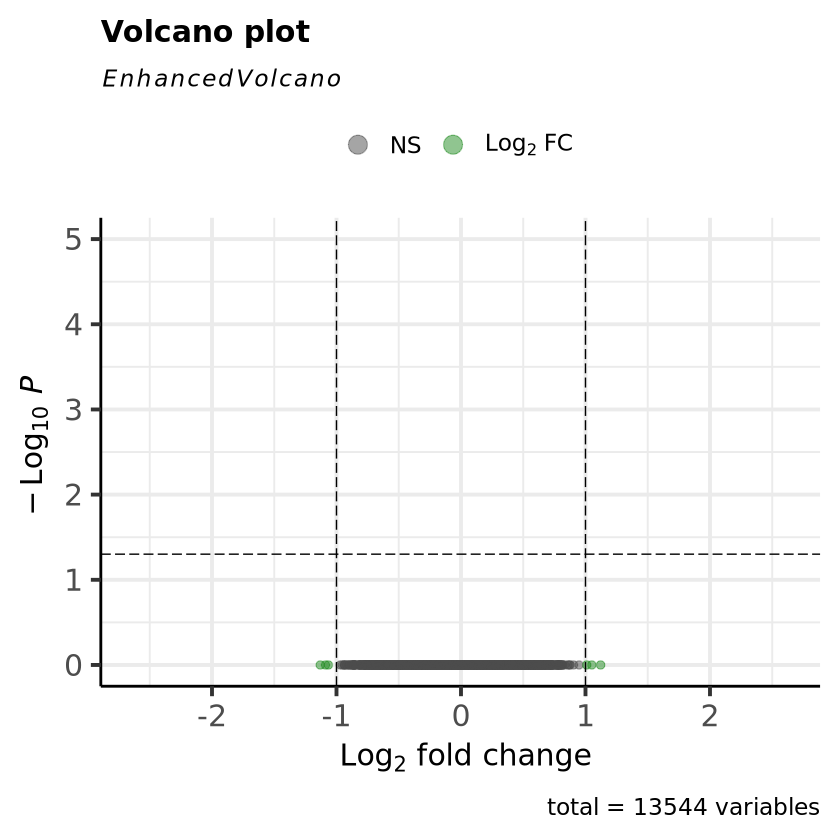

In [23]:
# phase 1 hypoxic vs. control

contrast7 <- c("Phase1", "hypoxic", "control")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls7<-lfcShrink(p1_dds, # dds object
                      contrast = contrast7, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls7)

EnhancedVolcano(ls7, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for phase 1 hypoxic

0 DMGs for phase 1 control

In [24]:
write.csv(as.data.frame(ls7), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/Hx_vs_Cx.csv")

### Phase 2 control vs. hypoxic
xC vs. xH

In [25]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p2_dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 548 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13499 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 26, 0.19%
LFC < -0.25 (down) : 10, 0.074%
outliers [1]       : 515, 3.8%
low counts [2]     : 2288, 17%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



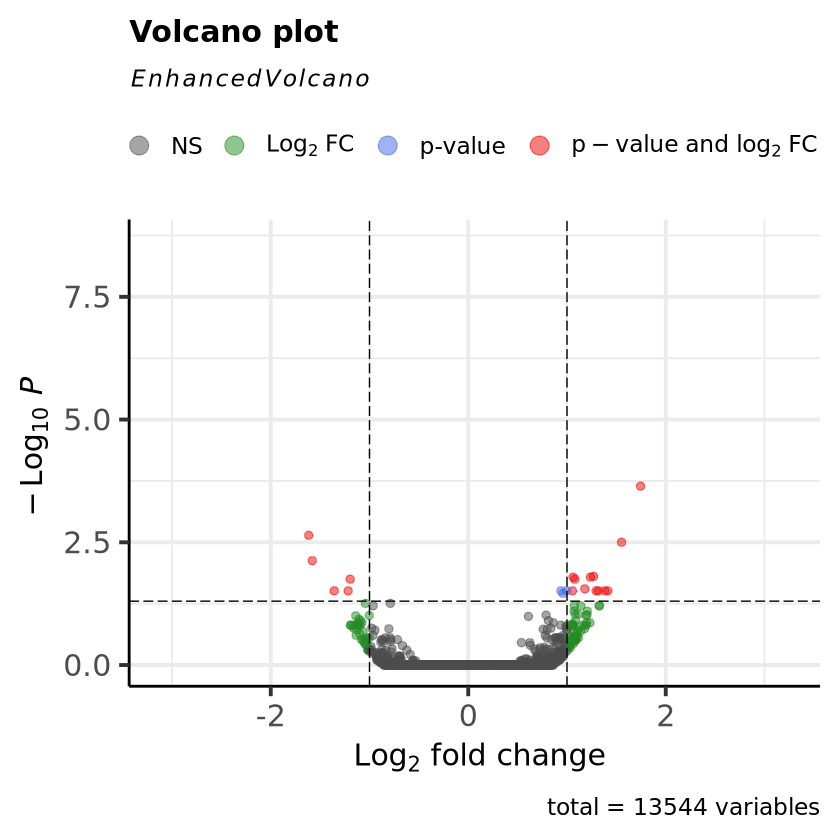

In [26]:
# phase 2 hypoxic vs. control

contrast8 <- c("Phase2", "hypoxic", "control")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls8<-lfcShrink(p2_dds, # dds object
                      contrast = contrast8, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls8)

EnhancedVolcano(ls8, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

26 DMGs for phase 2 hypoxic

10 DMGs for phase 2 control

In [27]:
write.csv(as.data.frame(ls8), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/xH_vs_xC.csv")

## NMDS Plot
using DESeq2 dds object (which used the argument design=~treatment)

In [17]:
# MDS plot

# normalization & transformation
vsd <- vst(dds)

# calculate sample distances
sample_dists <- assay(vsd) %>%
t() %>%
dist() %>%
as.matrix()

head(sample_dists)

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd))) # combine with sample data
head(mds)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
BBB-WBO-B21,0.00000,34.93468,40.20898,40.53628,34.50311,33.73489,40.63206,37.46529,38.95535,38.89426,38.22385,43.61557,44.94472,49.58951,39.24893,43.49049,43.05441,48.34448,45.55344,42.89952
BBB-WBV-B70,34.93468,0.00000,37.10066,39.36434,34.87267,34.05628,37.04769,37.91599,37.93849,43.56616,37.82055,42.62061,44.54559,50.66426,38.73115,38.90130,43.04876,48.55768,44.63161,41.27497
BBO-BBO-B16,40.20898,37.10066,0.00000,36.11546,36.37270,39.04640,34.64458,35.00831,33.01281,45.04242,37.89990,36.81027,40.47014,51.50297,37.35806,38.65033,39.90584,44.95157,37.80215,36.20556
BBO-BBY-B27,40.53628,39.36434,36.11546,0.00000,39.16446,38.88060,36.99644,36.35124,32.73366,46.20624,39.12206,38.79686,41.58968,51.43172,39.82782,41.87848,42.15819,46.15268,38.43952,34.76326
BBO-WBO-B16,34.50311,34.87267,36.37270,39.16446,0.00000,33.99675,38.42418,38.12444,36.87233,41.89007,36.74566,41.54969,43.84551,50.75344,37.14641,42.06978,41.43903,45.77412,41.95618,40.93893
BBO-WBV-B64,33.73489,34.05628,39.04640,38.88060,33.99675,0.00000,39.55973,38.12358,36.17110,42.59600,35.03185,41.71171,42.57392,48.63575,38.47146,41.79086,43.07949,47.44227,43.92437,40.79415


,X1,X2,Phase1,Phase2,treatment,sizeFactor
,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>
BBB-WBO-B21,-13.600639,-12.01671082,hypoxic,control,hypoxic_control,2.463516
BBB-WBV-B70,-8.028627,-8.78980292,hypoxic,control,hypoxic_control,2.170227
BBO-BBO-B16,6.720426,0.02712153,hypoxic,hypoxic,hypoxic_hypoxic,1.712997
BBO-BBY-B27,6.661786,2.32908321,hypoxic,hypoxic,hypoxic_hypoxic,1.188859
BBO-WBO-B16,-6.802087,-9.25350945,hypoxic,control,hypoxic_control,2.535170
BBO-WBV-B64,-10.374812,-6.53808194,hypoxic,control,hypoxic_control,2.300755


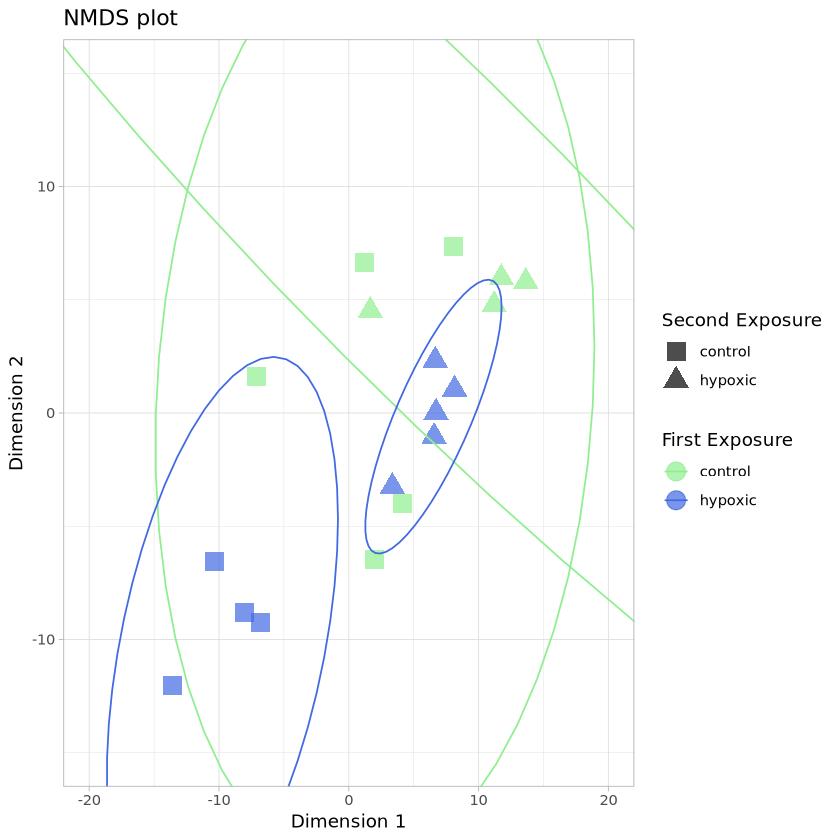

In [18]:
# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()

Dimension 1 explains 12.61 % of variation
Dimension 2 explains 10.52 % of variation


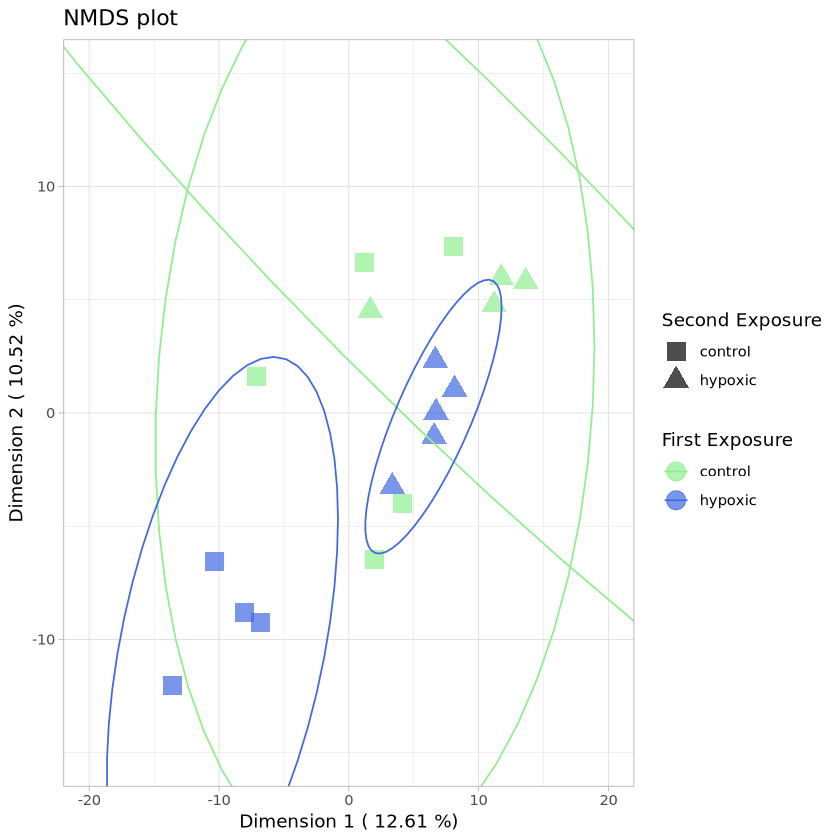

In [19]:
# Calculate eigenvalues
eigenvalues <- cmdscale(sample_dists, k = 2, eig = TRUE)$eig

# Calculate percentage variation explained
variation_explained <- (eigenvalues / sum(eigenvalues)) * 100

# Print results
cat("Dimension 1 explains", round(variation_explained[1], 2), "% of variation\n")
cat("Dimension 2 explains", round(variation_explained[2], 2), "% of variation\n")

# Add labels to plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
  scale_shape_manual(values = c(15, 17)) +
  coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
  scale_color_manual(values = c('lightgreen','royalblue')) +
  labs(title = "NMDS plot", 
       #subtitle = paste("Dimension 1:", round(variation_explained[1], 2), "%, Dimension 2:", round(variation_explained[2], 2), "%"),
       x = paste("Dimension 1 (", round(variation_explained[1], 2), "%)"), 
       y = paste("Dimension 2 (", round(variation_explained[2], 2), "%)"),
       color = "First Exposure", 
       shape = "Second Exposure") +
  stat_ellipse() +
  theme_light()

when considering all methylated loci, methylation status explains 23.89% of variation

same plot as above, but want to add sample names to the plot so I can check out the 'outlier' point

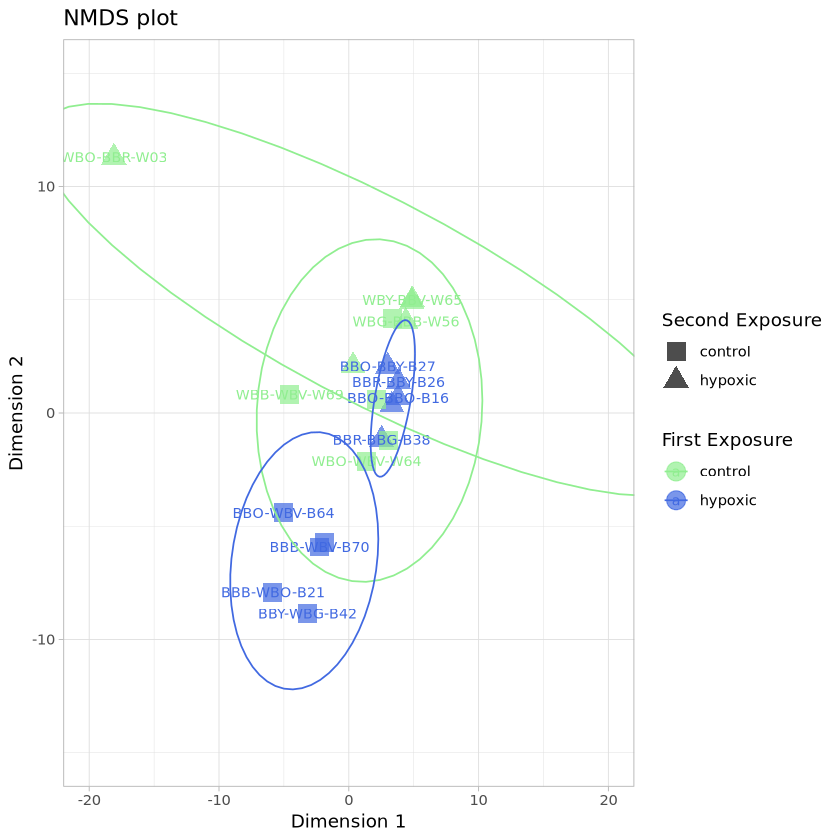

In [30]:
# extract sample names
sample_names <- rownames(mds)
# add sample names to mds data frame
mds$Sample <- sample_names

# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
  geom_text(aes(label = Sample), check_overlap = TRUE, size = 3) +
labs(title = "NMDS plot", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()

doing the same NMDS plot but only for genes that were identified as sig. DM in any pairwise comparison

In [20]:
# CC vs. HC
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HC.csv')
df1 <- filter(CC_HC, padj < 0.05)
rownames(df1) <- df1$X

# CH_HC
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CH_vs_HC.csv')
df2 <- filter(CH_HC, padj < 0.05)
rownames(df2) <- df2$X

# HH_HC
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_HC.csv')
df3 <- filter(HH_HC, padj < 0.05)
rownames(df3) <- df3$X

# HH_CH
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_CH.csv')
df4 <- filter(HH_CH, padj < 0.05)
rownames(df4) <- df4$X

# HH_CC
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HH.csv')
df5 <- filter(HH_CC, padj < 0.05)
rownames(df5) <- df5$X

# CC_CH
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_CH.csv')
df6 <- filter(CC_CH, padj < 0.05)
rownames(df6) <- df6$X

# Define the list of dataframes containing DMGs
dmg_dfs <- list(df1, df2, df3, df4, df5, df6)

# Extract unique gene names from all dataframes
all_dmg_genes <- unique(unlist(lapply(dmg_dfs, function(x) rownames(x))))

,X1,X2,Phase1,Phase2,treatment,sizeFactor
,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>
BBB-WBO-B21,-3.432157,0.18207929,hypoxic,control,hypoxic_control,2.383679
BBB-WBV-B70,-2.702244,0.12118211,hypoxic,control,hypoxic_control,2.070380
BBO-BBO-B16,1.141489,0.78696970,hypoxic,hypoxic,hypoxic_hypoxic,1.679982
BBO-BBY-B27,1.058554,0.76442112,hypoxic,hypoxic,hypoxic_hypoxic,1.131588
BBO-WBO-B16,-2.767102,0.20281612,hypoxic,control,hypoxic_control,2.459313
BBO-WBV-B64,-2.926660,0.06603251,hypoxic,control,hypoxic_control,2.191596


Dimension 1 explains 52.26 % of variation
Dimension 2 explains 9.35 % of variation


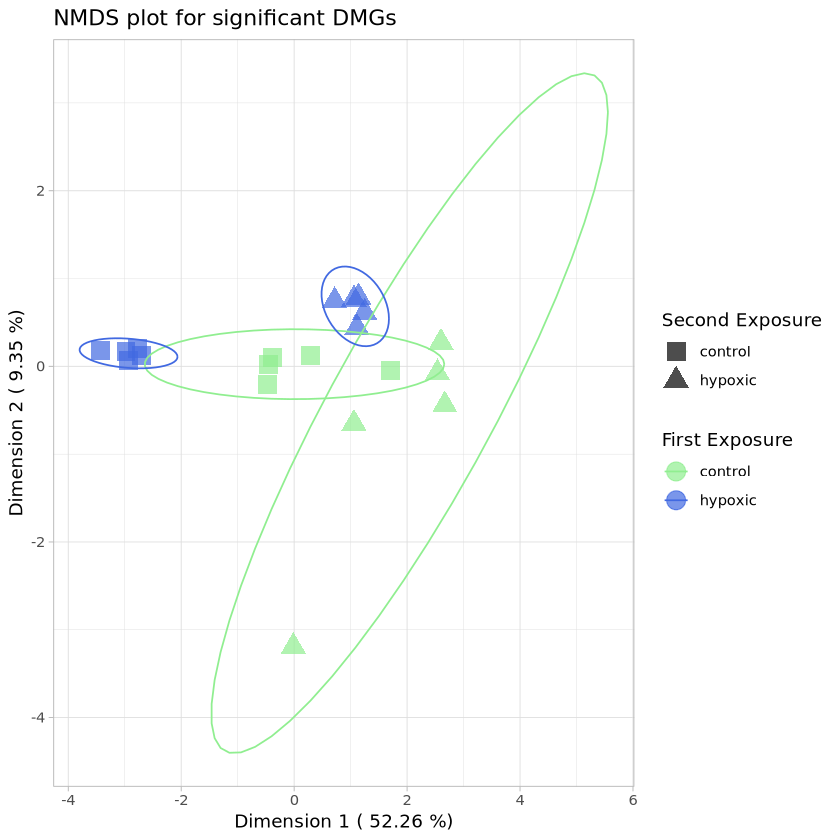

In [22]:
# MDS plot

# normalization & transformation
vsd <- vst(dds)

vsd_sig <- vsd[all_dmg_genes, ]

# calculate sample distances
sample_dists <- assay(vsd_sig) %>%
t() %>%
dist() %>%
as.matrix()

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd_sig))) # combine with sample data
head(mds)

# Calculate eigenvalues
eigenvalues <- cmdscale(sample_dists, k = 2, eig = TRUE)$eig

# Calculate percentage variation explained
variation_explained <- (eigenvalues / sum(eigenvalues)) * 100

# Print results
cat("Dimension 1 explains", round(variation_explained[1], 2), "% of variation\n")
cat("Dimension 2 explains", round(variation_explained[2], 2), "% of variation\n")

# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
#coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot for significant DMGs", 
     x = paste("Dimension 1 (", round(variation_explained[1], 2), "%)"), 
       y = paste("Dimension 2 (", round(variation_explained[2], 2), "%)"),
     color = "First Exposure", 
     shape = "Second Exposure") +
stat_ellipse() +
theme_light()

when considering only genes that are significantly differentially methylated in any pairwise comparison, methylation status explains 61.61% of the variation

## Heatmap

In [20]:
vsd <- vst(dds)

In [21]:
library(pheatmap)

In [22]:
ntd <- normTransform(dds)

In [26]:

# Create annotation data frame
df <- as.data.frame(colData(dds)[,c("Phase2", "Phase1")])
colnames(df) <- c("Phase 2", "Phase 1")

# Define color palette
phase1_colors <- c("control" = "white", "hypoxic" = "black")
phase2_colors <- c("control" = "white", "hypoxic" = "black")

# Create heatmap
pheatmap(assay(dds))

ERROR: Error: cannot allocate vector of size 1963.9 Gb
